In [1]:
import numpy as np
import scipy.constants as cc
import matplotlib.pyplot as plt

# Import the script
from RashbaJunction import RashbaJunction
from RashbaJunction.PureRashba import PureRashba
# import utilities functions
from RashbaJunction.utilities import adjuct_Tick, make_grid, error_decorator

# Some relevant quantities
ev_to_j = 1.602176634e-19
hbar = 6.582119569e-16
m = 0.015*cc.m_e#µ
Ez = 0.1e-3*ev_to_j# mJ
k_z = np.sqrt(2*m*Ez)/cc.hbar# 1/Metr
x = 500e-9# Metr
x_prime =  k_z*x# adimensional
print(f"k_so {k_z}")
print(f"x' {x_prime}")


# set up directory to save figuures
BASE_PATH = "plots/paper_plots_2/paper/"
print(BASE_PATH)

# Matplot lib set up
font = {'family': "Times New Roman", "size": 25}

y_label = [r"$$ G [e^2/h]$$", r"$$T_0$$"]

x_label = [r"$E_F / E_Z$", "$E_F / E_{SO, L}$", "$E_F / E_{SO}$", "$k_{SO, L}\, d$", "$E_{SO, L} / E_{SO, R}$", r"$E / \Delta E_Z$"]

y_label_pos = [(-.05, 1.03), (-.09, 1)]
legend_font_size = 18
region_lbl = ["(a)", "(b)", "(c)"]
DPI = 110

k_so 6274572.777578376
x' 3.137286388789188
plots/paper_plots_2/paper/


# Pure Rashba

In [2]:
alp_l = 5
Eso_profile = [alp_l, 1]
x_profile = [0]

# In order to compute the properties of a pure rashba nanowire must be used a PureRashba class as a delegate
    # that allow to compute proper wave function and flux
junction = RashbaJunction([x_profile, Eso_profile], wave_function_delegate = PureRashba)

@error_decorator
def g(x, par):
    junction[1] = par * alp_l

    S = junction.get_scattering_matrix(x)
    if not S.is_unitary:
        print(f"not unitary matrix length: x-> {x}, par-> {par}")
        return np.nan
    else:
        return S.t_coef

# E_soR/E_soL
al_r_to_al_l= np.array([1, .5, -1, -.5])
# energy is dimensional
enn = np.arange(-1, 5, 0.011)

trasmission_coeff_total = make_grid(enn, al_r_to_al_l, [g])

In [3]:
# analitical result
def potential_step(E, p = 1):
    return 8*np.sqrt(E+1)*np.sqrt(E+p) / (np.sqrt(E+1)+np.sqrt(E+p))**2

<IPython.core.display.Javascript object>


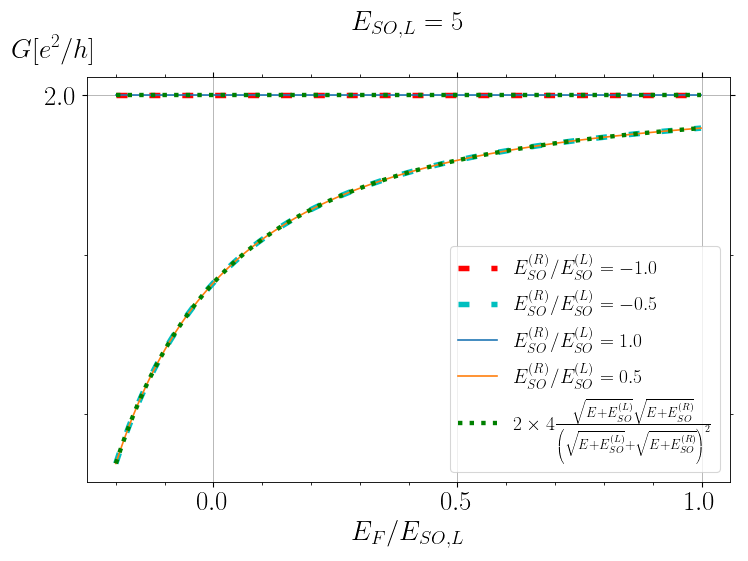

-1.0
-0.5
1.0
0.5
plots/paper_plots_2/paper/pure_rashba/pure_rashba.pdf


In [4]:
%matplotlib notebook
%matplotlib notebook

plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(12, 9), dpi=100, tight_layout=True, facecolor='white')

k_list = list(trasmission_coeff_total.keys())

c = ["r", "c"]
i = 0
for k in k_list[2:]:
    labll = r"$E_{SO}^{(R)} / E_{SO}^{(L)} = "f"{k}$"
    
    print(k)
    axs.plot(enn/alp_l, trasmission_coeff_total[k][0],
                   label=labll, linestyle=(0, (2, 4)), color=c[i], linewidth=5)
    i+=1

    
ll = [None, r"$ \small 2 \times 4\frac{\sqrt{E + E_{SO}^{(L)}}\sqrt{E + E_{SO}^{(R)}}}{\Bigg(\sqrt{E + E_{SO}^{(L)}} + \sqrt{E + E_{SO}^{(R)}}\Bigg)^2}$"]
i = 0
for k in k_list[:2]:
    labll = r"$E_{SO}^{(R)} / E_{SO}^{(L)} = "f"{k}$"
    print(k)
    axs.plot(enn/alp_l, trasmission_coeff_total[k][0],
                   label=labll)
    axs.plot(enn/alp_l, [potential_step(i, k) for i in enn/alp_l],
                   label=ll[i], linestyle="dotted", color='green', linewidth=4)
    i+=1
    


axs.grid()
axs.legend(fontsize = legend_font_size)
axs.set_xlabel(x_label[1], fontdict=font)
axs.set_ylabel(y_label[0], rotation=0, fontdict=font)
axs.yaxis.set_label_coords(*y_label_pos[0])

x_magior = np.array([0.5])
x_minor = np.array([0.1])

y_magior = np.array([0.2])
y_minor = np.array([0.05])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])

plt.title(r"$E_{SO, L} = "+f"{alp_l}$", 
              fontsize = 25, x=0.5, y=1.1)

# SAVE = True
SAVE = False

save_path = BASE_PATH+"pure_rashba/"+f"pure_rashba.pdf"
print(save_path)

if SAVE:
    plt.savefig(save_path, 
            transparent = False, 
            bbox_inches='tight')

plt.show()

# Single interface test

Check if out of range energy values are handled correctly for different regimes of the nanowire. 

In [5]:
alp_r = -10
Eso_profile = [0, 0]
x_profile = [0]

junction = RashbaJunction([x_profile, Eso_profile])
  
@error_decorator
def g(x, par):
    junction[0] = par[0]
    junction[1] = par[1]

    S = junction.get_scattering_matrix(x)
    if not S.is_unitary:
        print(f"not unitary matrix length: x-> {x}, par-> {par}")
        return np.nan
    else:
        return S.t_coef

# parameters are (E_soL/E_z, E_soR/E_z)
param = [(0.2, 10), (0.4, 10), (1, 10),
        (10, 0.2), (10, 0.4), (10, 1)]
# Energy E/E_z
en = np.arange(-5, 1.5, 0.011)

special_opoints = [1]
err = [-1e-10]
for p, e in zip(special_opoints, err):
    idx = np.abs(en - p).argmin()
    en[idx] = p + e

trasmission_coeff_total = make_grid(en, param, [g])

In Zeeman regime E = -5.00 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-5.0, par=(0.2, 10)
In Zeeman regime E = -4.99 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-4.989, par=(0.2, 10)
In Zeeman regime E = -4.98 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-4.978, par=(0.2, 10)
In Zeeman regime E = -4.97 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-4.967, par=(0.2, 10)
In Zeeman regime E = -4.96 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-4.9559999999999995, par=(0.2, 10)
In Zeeman regime E = -4.94 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-4.944999999999999, par=(0.2, 10)
In Zeeman regime E = -4.93 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-4.933999999999999, par=(0.2, 10)
In Zeeman regime E = -4.92 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-4.922999999999999, par=(0.2, 10)
In Zeeman regime E = -4.91 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-4.911999999999999, par=(0.2, 10)
In Zeeman regime E = -4.90 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-4.900999999999999, par=(0.2, 10)
In Zeeman regime E = -4.89 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-4.889999999999999, par=(0.

In Zeeman regime E = -1.57 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-1.5679999999999623, par=(0.2, 10)
In Zeeman regime E = -1.56 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-1.5569999999999622, par=(0.2, 10)
In Zeeman regime E = -1.55 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-1.545999999999962, par=(0.2, 10)
In Zeeman regime E = -1.53 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-1.534999999999962, par=(0.2, 10)
In Zeeman regime E = -1.52 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-1.5239999999999618, par=(0.2, 10)
In Zeeman regime E = -1.51 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-1.5129999999999617, par=(0.2, 10)
In Zeeman regime E = -1.50 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-1.5019999999999616, par=(0.2, 10)
In Zeeman regime E = -1.49 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-1.4909999999999615, par=(0.2, 10)
In Zeeman regime E = -1.48 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-1.4799999999999613, par=(0.2, 10)
In Zeeman regime E = -1.47 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-1.4689999999999612, par=(0.2, 10)
In Zeeman regime E = -1.46 < -Es

In Weak Zeeman regime E = -5.00 < -Eso (1 + (Ez/2Eso)^2) = -1.03 x=-5.0, par=(0.4, 10)
In Weak Zeeman regime E = -4.99 < -Eso (1 + (Ez/2Eso)^2) = -1.03 x=-4.989, par=(0.4, 10)
In Weak Zeeman regime E = -4.98 < -Eso (1 + (Ez/2Eso)^2) = -1.03 x=-4.978, par=(0.4, 10)
In Weak Zeeman regime E = -4.97 < -Eso (1 + (Ez/2Eso)^2) = -1.03 x=-4.967, par=(0.4, 10)
In Weak Zeeman regime E = -4.96 < -Eso (1 + (Ez/2Eso)^2) = -1.03 x=-4.9559999999999995, par=(0.4, 10)
In Weak Zeeman regime E = -4.94 < -Eso (1 + (Ez/2Eso)^2) = -1.03 x=-4.944999999999999, par=(0.4, 10)
In Weak Zeeman regime E = -4.93 < -Eso (1 + (Ez/2Eso)^2) = -1.03 x=-4.933999999999999, par=(0.4, 10)
In Weak Zeeman regime E = -4.92 < -Eso (1 + (Ez/2Eso)^2) = -1.03 x=-4.922999999999999, par=(0.4, 10)
In Weak Zeeman regime E = -4.91 < -Eso (1 + (Ez/2Eso)^2) = -1.03 x=-4.911999999999999, par=(0.4, 10)
In Weak Zeeman regime E = -4.90 < -Eso (1 + (Ez/2Eso)^2) = -1.03 x=-4.900999999999999, par=(0.4, 10)
In Weak Zeeman regime E = -4.89 < -Eso 

In Weak Zeeman regime E = -1.60 < -Eso (1 + (Ez/2Eso)^2) = -1.03 x=-1.6009999999999627, par=(0.4, 10)
In Weak Zeeman regime E = -1.59 < -Eso (1 + (Ez/2Eso)^2) = -1.03 x=-1.5899999999999626, par=(0.4, 10)
In Weak Zeeman regime E = -1.58 < -Eso (1 + (Ez/2Eso)^2) = -1.03 x=-1.5789999999999624, par=(0.4, 10)
In Weak Zeeman regime E = -1.57 < -Eso (1 + (Ez/2Eso)^2) = -1.03 x=-1.5679999999999623, par=(0.4, 10)
In Weak Zeeman regime E = -1.56 < -Eso (1 + (Ez/2Eso)^2) = -1.03 x=-1.5569999999999622, par=(0.4, 10)
In Weak Zeeman regime E = -1.55 < -Eso (1 + (Ez/2Eso)^2) = -1.03 x=-1.545999999999962, par=(0.4, 10)
In Weak Zeeman regime E = -1.53 < -Eso (1 + (Ez/2Eso)^2) = -1.03 x=-1.534999999999962, par=(0.4, 10)
In Weak Zeeman regime E = -1.52 < -Eso (1 + (Ez/2Eso)^2) = -1.03 x=-1.5239999999999618, par=(0.4, 10)
In Weak Zeeman regime E = -1.51 < -Eso (1 + (Ez/2Eso)^2) = -1.03 x=-1.5129999999999617, par=(0.4, 10)
In Weak Zeeman regime E = -1.50 < -Eso (1 + (Ez/2Eso)^2) = -1.03 x=-1.50199999999996

In Rashba dominated regime E = -2.30 < -Eso (1 + (Ez/2Eso)^2) = -1.25 x=-2.3049999999999704, par=(1, 10)
In Rashba dominated regime E = -2.29 < -Eso (1 + (Ez/2Eso)^2) = -1.25 x=-2.2939999999999703, par=(1, 10)
In Rashba dominated regime E = -2.28 < -Eso (1 + (Ez/2Eso)^2) = -1.25 x=-2.28299999999997, par=(1, 10)
In Rashba dominated regime E = -2.27 < -Eso (1 + (Ez/2Eso)^2) = -1.25 x=-2.27199999999997, par=(1, 10)
In Rashba dominated regime E = -2.26 < -Eso (1 + (Ez/2Eso)^2) = -1.25 x=-2.26099999999997, par=(1, 10)
In Rashba dominated regime E = -2.25 < -Eso (1 + (Ez/2Eso)^2) = -1.25 x=-2.24999999999997, par=(1, 10)
In Rashba dominated regime E = -2.24 < -Eso (1 + (Ez/2Eso)^2) = -1.25 x=-2.2389999999999697, par=(1, 10)
In Rashba dominated regime E = -2.23 < -Eso (1 + (Ez/2Eso)^2) = -1.25 x=-2.2279999999999696, par=(1, 10)
In Rashba dominated regime E = -2.22 < -Eso (1 + (Ez/2Eso)^2) = -1.25 x=-2.2169999999999694, par=(1, 10)
In Rashba dominated regime E = -2.21 < -Eso (1 + (Ez/2Eso)^2) =

In Zeeman regime E = -5.00 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-5.0, par=(10, 0.2)
In Zeeman regime E = -4.99 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-4.989, par=(10, 0.2)
In Zeeman regime E = -4.98 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-4.978, par=(10, 0.2)
In Zeeman regime E = -4.97 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-4.967, par=(10, 0.2)
In Zeeman regime E = -4.96 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-4.9559999999999995, par=(10, 0.2)
In Zeeman regime E = -4.94 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-4.944999999999999, par=(10, 0.2)
In Zeeman regime E = -4.93 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-4.933999999999999, par=(10, 0.2)
In Zeeman regime E = -4.92 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-4.922999999999999, par=(10, 0.2)
In Zeeman regime E = -4.91 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-4.911999999999999, par=(10, 0.2)
In Zeeman regime E = -4.90 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-4.900999999999999, par=(10, 0.2)
In Zeeman regime E = -4.89 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-4.889999999999999, par=(10

In Weak Zeeman regime E = -5.00 < -Eso (1 + (Ez/2Eso)^2) = -1.03 x=-5.0, par=(10, 0.4)
In Weak Zeeman regime E = -4.99 < -Eso (1 + (Ez/2Eso)^2) = -1.03 x=-4.989, par=(10, 0.4)
In Weak Zeeman regime E = -4.98 < -Eso (1 + (Ez/2Eso)^2) = -1.03 x=-4.978, par=(10, 0.4)
In Weak Zeeman regime E = -4.97 < -Eso (1 + (Ez/2Eso)^2) = -1.03 x=-4.967, par=(10, 0.4)
In Weak Zeeman regime E = -4.96 < -Eso (1 + (Ez/2Eso)^2) = -1.03 x=-4.9559999999999995, par=(10, 0.4)
In Weak Zeeman regime E = -4.94 < -Eso (1 + (Ez/2Eso)^2) = -1.03 x=-4.944999999999999, par=(10, 0.4)
In Weak Zeeman regime E = -4.93 < -Eso (1 + (Ez/2Eso)^2) = -1.03 x=-4.933999999999999, par=(10, 0.4)
In Weak Zeeman regime E = -4.92 < -Eso (1 + (Ez/2Eso)^2) = -1.03 x=-4.922999999999999, par=(10, 0.4)
In Weak Zeeman regime E = -4.91 < -Eso (1 + (Ez/2Eso)^2) = -1.03 x=-4.911999999999999, par=(10, 0.4)
In Weak Zeeman regime E = -4.90 < -Eso (1 + (Ez/2Eso)^2) = -1.03 x=-4.900999999999999, par=(10, 0.4)
In Weak Zeeman regime E = -4.89 < -Eso 

In Rashba dominated regime E = -5.00 < -Eso (1 + (Ez/2Eso)^2) = -1.25 x=-5.0, par=(10, 1)
In Rashba dominated regime E = -4.99 < -Eso (1 + (Ez/2Eso)^2) = -1.25 x=-4.989, par=(10, 1)
In Rashba dominated regime E = -4.98 < -Eso (1 + (Ez/2Eso)^2) = -1.25 x=-4.978, par=(10, 1)
In Rashba dominated regime E = -4.97 < -Eso (1 + (Ez/2Eso)^2) = -1.25 x=-4.967, par=(10, 1)
In Rashba dominated regime E = -4.96 < -Eso (1 + (Ez/2Eso)^2) = -1.25 x=-4.9559999999999995, par=(10, 1)
In Rashba dominated regime E = -4.94 < -Eso (1 + (Ez/2Eso)^2) = -1.25 x=-4.944999999999999, par=(10, 1)
In Rashba dominated regime E = -4.93 < -Eso (1 + (Ez/2Eso)^2) = -1.25 x=-4.933999999999999, par=(10, 1)
In Rashba dominated regime E = -4.92 < -Eso (1 + (Ez/2Eso)^2) = -1.25 x=-4.922999999999999, par=(10, 1)
In Rashba dominated regime E = -4.91 < -Eso (1 + (Ez/2Eso)^2) = -1.25 x=-4.911999999999999, par=(10, 1)
In Rashba dominated regime E = -4.90 < -Eso (1 + (Ez/2Eso)^2) = -1.25 x=-4.900999999999999, par=(10, 1)
In Rashba

<IPython.core.display.Javascript object>


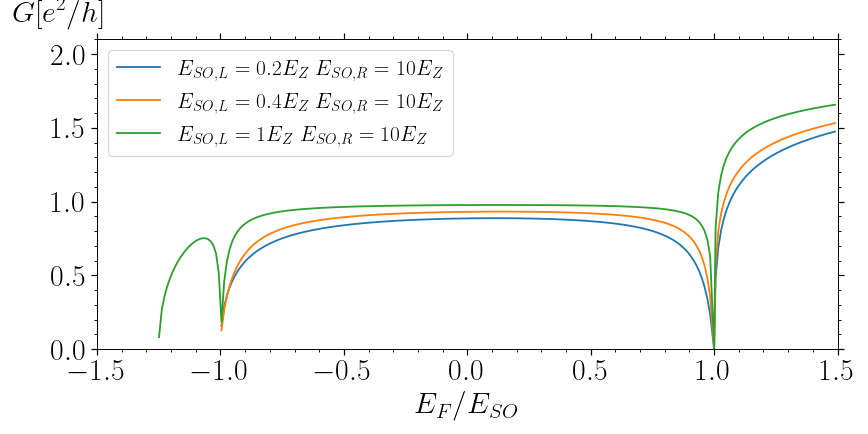

(0.2, 10)
(0.4, 10)
(1, 10)
plots/paper_plots_2/paper/Single_interface[(0.2, 10), (0.4, 10), (1, 10)].pdf


In [6]:
%matplotlib notebook
%matplotlib notebook

plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(10, 5), dpi=DPI, tight_layout=True, facecolor='white')

k_list = list(trasmission_coeff_total.keys())

for i, k in enumerate(k_list[:3]):
    print(k)
    axs.plot(en, trasmission_coeff_total[k][0],
                   label=r"$E_{SO,L} = "f"{k[0]}"r"E_Z$ " + r"$E_{SO,R} = "f"{k[1]}"r"E_Z$")

axs.set_ylim(0,2.1)
axs.set_xlim(-1.5, 1.5)

# axs.grid()
axs.legend(fontsize = legend_font_size)
axs.set_xlabel(x_label[2], fontdict=font)
axs.set_ylabel(y_label[0], rotation=0, fontdict=font)


axs.yaxis.set_label_coords(*y_label_pos[0])

x_magior = np.array([0.5])
x_minor = np.array([0.1])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])

# SAVE = True
SAVE = False

save_path = BASE_PATH+f"Single_interface{k_list[:3]}.pdf"
print(save_path)

if SAVE:
    plt.savefig(save_path, 
            transparent = False, 
            bbox_inches='tight')

plt.show()

<IPython.core.display.Javascript object>


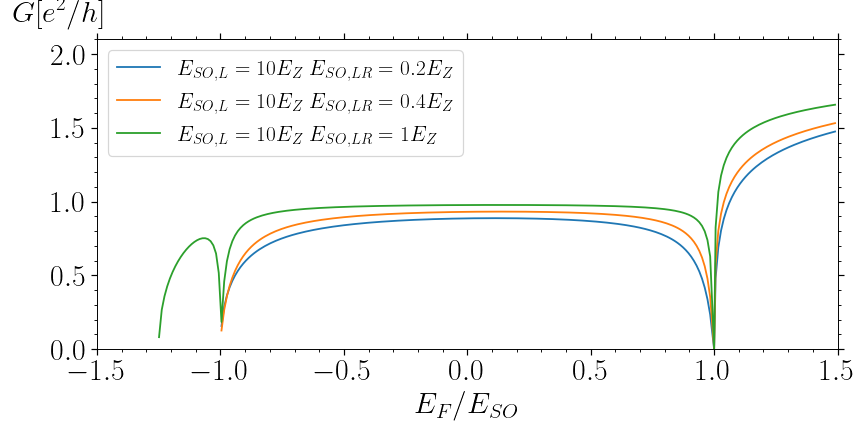

(10, 0.2)
(10, 0.4)
(10, 1)
plots/paper_plots_2/paper/Single_interface[(0.2, 10), (0.4, 10), (1, 10)].pdf


In [7]:
%matplotlib notebook
%matplotlib notebook

plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(10, 5), dpi=DPI, tight_layout=True, facecolor='white')

k_list = list(trasmission_coeff_total.keys())

for i, k in enumerate(k_list[3:]):
    print(k)
    axs.plot(en, trasmission_coeff_total[k][0],
                   label=r"$E_{SO,L} = "f"{k[0]}"r"E_Z$ " + r"$E_{SO,LR} = "f"{k[1]}"r"E_Z$")

axs.set_ylim(0,2.1)
axs.set_xlim(-1.5, 1.5)

# axs.grid()
axs.legend(fontsize = legend_font_size)
axs.set_xlabel(x_label[2], fontdict=font)
axs.set_ylabel(y_label[0], rotation=0, fontdict=font)


axs.yaxis.set_label_coords(*y_label_pos[0])

x_magior = np.array([0.5])
x_minor = np.array([0.1])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])

# SAVE = True
SAVE = False

save_path = BASE_PATH+f"Single_interface{k_list[:3]}.pdf"
print(save_path)

if SAVE:
    plt.savefig(save_path, 
            transparent = False, 
            bbox_inches='tight')

plt.show()

# Double interfaces

## Lead model

In [8]:
alp_r = -10
Eso_profile = [0, alp_r, 0]
x_profile = [0, 1]

junction = RashbaJunction([x_profile, Eso_profile])
  
@error_decorator
def g(x, par):
    junction[1] = par[1]
    junction.interface[0] = -par[0] /2
    junction.interface[1] = par[0] / 2
    S = junction.get_scattering_matrix(x)
    if not S.is_unitary:
        print(f"not unitary matrix length: x-> {x}, par-> {par}")
        return np.nan
    else:
        return S.t_coef

# parameters (k_z*d, E_so/E_z)
param = [(10, .1), (10, .4), (10, 10)]
# energy E / E_z
en = np.arange(-1+1e-7, 1.5, 0.011)

special_opoints = [1]
err = [-1e-10]
for p, e in zip(special_opoints, err):
    idx = np.abs(en - p).argmin()
    en[idx] = p + e

trasmission_coeff_total = make_grid(en, param, [g])#, gp])

# SAVE = True
SAVE = False

<IPython.core.display.Javascript object>


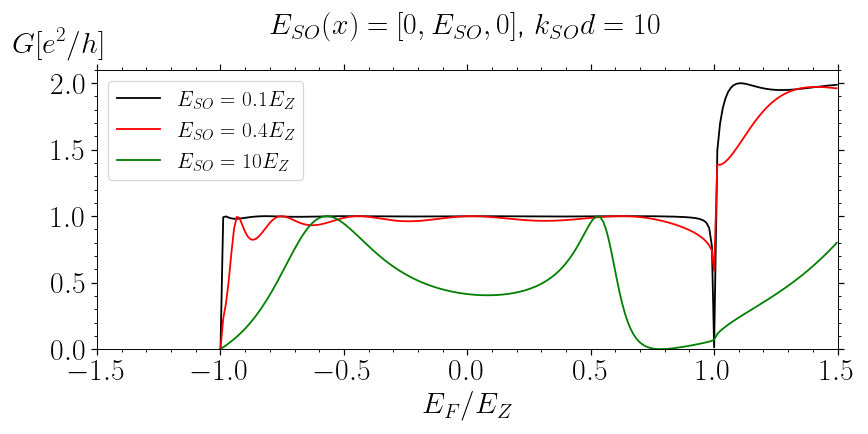

(10, 0.1)
(10, 0.4)
(10, 10)
plots/paper_plots_2/paper/Finite_rashba_nanowire[(10, 0.1), (10, 0.4), (10, 10)].pdf


In [13]:
%matplotlib notebook
%matplotlib notebook

plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(10, 5), dpi=DPI, tight_layout=True, facecolor='white')

k_list = list(trasmission_coeff_total.keys())

colors = ["black", "r", "green"]
for i, k in enumerate(k_list[:3]):
    print(k)
    axs.plot(en, trasmission_coeff_total[k][0],
                   label=r"$E_{SO} = "f"{k[1]}"r"E_Z$", color=colors[i])

axs.set_ylim(0,2.1)
axs.set_xlim(-1.5, 1.5)

# axs.grid()
axs.legend(fontsize = legend_font_size)
axs.set_xlabel(x_label[0], fontdict=font)
axs.set_ylabel(y_label[0], rotation=0, fontdict=font)


axs.yaxis.set_label_coords(*y_label_pos[0])

x_magior = np.array([0.5])
x_minor = np.array([0.1])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])

plt.title(r"$E_{SO}(x) = [0, E_{SO}, 0]$, $k_{SO}d = "+f"{k_list[0][0]}$", 
              fontsize = 25, x=0.5, y=1.1)

# SAVE = True
SAVE = False

save_path = BASE_PATH+f"Finite_rashba_nanowire{k_list[:3]}.pdf"
print(save_path)

if SAVE:
    plt.savefig(save_path, 
            transparent = False, 
            bbox_inches='tight')

plt.show()

## Magnetic barrier

In [14]:
Eso_profile = [1, 0, 1]

# k_so*d = 2
x_profile = [-1, 1]

junction = RashbaJunction([x_profile, Eso_profile])
  
@error_decorator
def g(x, par):
    junction[0] = par[0]
    junction[1] = par[1]
    junction[2] = par[2]
    S = junction.get_scattering_matrix(x)
    if not S.is_unitary:
        print(f"not unitary matrix length: x-> {x}, par-> {par}")
        return np.nan
    else:
        return S.t_coef


        
param = [(0.2, 0, 10), (0.4, 0, 10), (1, 0, 10),
        (10, 0.6, 0.2), (10, 0.6,  0.4), (10, 0.6, 1)]

en = np.arange(-5, 1.5, 0.011)

special_opoints = [1]
err = [-1e-10]
for p, e in zip(special_opoints, err):
    idx = np.abs(en - p).argmin()
    en[idx] = p + e

trasmission_coeff_total = make_grid(en, param, [g])#, gp])

# SAVE = True
SAVE = False

In Zeeman regime E = -5.00 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-5.0, par=(0.2, 0, 10)
In Zeeman regime E = -4.99 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-4.989, par=(0.2, 0, 10)
In Zeeman regime E = -4.98 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-4.978, par=(0.2, 0, 10)
In Zeeman regime E = -4.97 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-4.967, par=(0.2, 0, 10)
In Zeeman regime E = -4.96 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-4.9559999999999995, par=(0.2, 0, 10)
In Zeeman regime E = -4.94 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-4.944999999999999, par=(0.2, 0, 10)
In Zeeman regime E = -4.93 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-4.933999999999999, par=(0.2, 0, 10)
In Zeeman regime E = -4.92 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-4.922999999999999, par=(0.2, 0, 10)
In Zeeman regime E = -4.91 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-4.911999999999999, par=(0.2, 0, 10)
In Zeeman regime E = -4.90 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-4.900999999999999, par=(0.2, 0, 10)
In Zeeman regime E = -4.89 < -Eso (1 + (Ez/2Eso)^2) = -1.45

In Zeeman regime E = -3.72 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-3.723999999999986, par=(0.2, 0, 10)
In Zeeman regime E = -3.71 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-3.712999999999986, par=(0.2, 0, 10)
In Zeeman regime E = -3.70 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-3.7019999999999857, par=(0.2, 0, 10)
In Zeeman regime E = -3.69 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-3.6909999999999856, par=(0.2, 0, 10)
In Zeeman regime E = -3.68 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-3.6799999999999855, par=(0.2, 0, 10)
In Zeeman regime E = -3.67 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-3.6689999999999854, par=(0.2, 0, 10)
In Zeeman regime E = -3.66 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-3.6579999999999853, par=(0.2, 0, 10)
In Zeeman regime E = -3.65 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-3.646999999999985, par=(0.2, 0, 10)
In Zeeman regime E = -3.64 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-3.635999999999985, par=(0.2, 0, 10)
In Zeeman regime E = -3.62 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-3.624999999999985, par=(0.2, 0, 10)
In Ze

In Zeeman regime E = -2.37 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-2.370999999999971, par=(0.2, 0, 10)
In Zeeman regime E = -2.36 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-2.359999999999971, par=(0.2, 0, 10)
In Zeeman regime E = -2.35 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-2.348999999999971, par=(0.2, 0, 10)
In Zeeman regime E = -2.34 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-2.3379999999999708, par=(0.2, 0, 10)
In Zeeman regime E = -2.33 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-2.3269999999999706, par=(0.2, 0, 10)
In Zeeman regime E = -2.32 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-2.3159999999999705, par=(0.2, 0, 10)
In Zeeman regime E = -2.30 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-2.3049999999999704, par=(0.2, 0, 10)
In Zeeman regime E = -2.29 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-2.2939999999999703, par=(0.2, 0, 10)
In Zeeman regime E = -2.28 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-2.28299999999997, par=(0.2, 0, 10)
In Zeeman regime E = -2.27 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-2.27199999999997, par=(0.2, 0, 10)
In Zeem

Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.0949999999999571, par=(0.2, 0, 10)
Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.083999999999957, par=(0.2, 0, 10)
Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.0729999999999569, par=(0.2, 0, 10)
Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.0619999999999568, par=(0.2, 0, 10)
Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scatterin

In Weak Zeeman regime E = -3.84 < -Eso (1 + (Ez/2Eso)^2) = -1.03 x=-3.8449999999999873, par=(0.4, 0, 10)
In Weak Zeeman regime E = -3.83 < -Eso (1 + (Ez/2Eso)^2) = -1.03 x=-3.833999999999987, par=(0.4, 0, 10)
In Weak Zeeman regime E = -3.82 < -Eso (1 + (Ez/2Eso)^2) = -1.03 x=-3.822999999999987, par=(0.4, 0, 10)
In Weak Zeeman regime E = -3.81 < -Eso (1 + (Ez/2Eso)^2) = -1.03 x=-3.811999999999987, par=(0.4, 0, 10)
In Weak Zeeman regime E = -3.80 < -Eso (1 + (Ez/2Eso)^2) = -1.03 x=-3.800999999999987, par=(0.4, 0, 10)
In Weak Zeeman regime E = -3.79 < -Eso (1 + (Ez/2Eso)^2) = -1.03 x=-3.7899999999999867, par=(0.4, 0, 10)
In Weak Zeeman regime E = -3.78 < -Eso (1 + (Ez/2Eso)^2) = -1.03 x=-3.7789999999999866, par=(0.4, 0, 10)
In Weak Zeeman regime E = -3.77 < -Eso (1 + (Ez/2Eso)^2) = -1.03 x=-3.7679999999999865, par=(0.4, 0, 10)
In Weak Zeeman regime E = -3.76 < -Eso (1 + (Ez/2Eso)^2) = -1.03 x=-3.7569999999999864, par=(0.4, 0, 10)
In Weak Zeeman regime E = -3.75 < -Eso (1 + (Ez/2Eso)^2) = 

In Weak Zeeman regime E = -2.88 < -Eso (1 + (Ez/2Eso)^2) = -1.03 x=-2.8769999999999767, par=(0.4, 0, 10)
In Weak Zeeman regime E = -2.87 < -Eso (1 + (Ez/2Eso)^2) = -1.03 x=-2.8659999999999766, par=(0.4, 0, 10)
In Weak Zeeman regime E = -2.85 < -Eso (1 + (Ez/2Eso)^2) = -1.03 x=-2.8549999999999764, par=(0.4, 0, 10)
In Weak Zeeman regime E = -2.84 < -Eso (1 + (Ez/2Eso)^2) = -1.03 x=-2.8439999999999763, par=(0.4, 0, 10)
In Weak Zeeman regime E = -2.83 < -Eso (1 + (Ez/2Eso)^2) = -1.03 x=-2.832999999999976, par=(0.4, 0, 10)
In Weak Zeeman regime E = -2.82 < -Eso (1 + (Ez/2Eso)^2) = -1.03 x=-2.821999999999976, par=(0.4, 0, 10)
In Weak Zeeman regime E = -2.81 < -Eso (1 + (Ez/2Eso)^2) = -1.03 x=-2.810999999999976, par=(0.4, 0, 10)
In Weak Zeeman regime E = -2.80 < -Eso (1 + (Ez/2Eso)^2) = -1.03 x=-2.799999999999976, par=(0.4, 0, 10)
In Weak Zeeman regime E = -2.79 < -Eso (1 + (Ez/2Eso)^2) = -1.03 x=-2.7889999999999757, par=(0.4, 0, 10)
In Weak Zeeman regime E = -2.78 < -Eso (1 + (Ez/2Eso)^2) = 

In Weak Zeeman regime E = -1.79 < -Eso (1 + (Ez/2Eso)^2) = -1.03 x=-1.7879999999999647, par=(0.4, 0, 10)
In Weak Zeeman regime E = -1.78 < -Eso (1 + (Ez/2Eso)^2) = -1.03 x=-1.7769999999999646, par=(0.4, 0, 10)
In Weak Zeeman regime E = -1.77 < -Eso (1 + (Ez/2Eso)^2) = -1.03 x=-1.7659999999999645, par=(0.4, 0, 10)
In Weak Zeeman regime E = -1.75 < -Eso (1 + (Ez/2Eso)^2) = -1.03 x=-1.7549999999999644, par=(0.4, 0, 10)
In Weak Zeeman regime E = -1.74 < -Eso (1 + (Ez/2Eso)^2) = -1.03 x=-1.7439999999999642, par=(0.4, 0, 10)
In Weak Zeeman regime E = -1.73 < -Eso (1 + (Ez/2Eso)^2) = -1.03 x=-1.7329999999999641, par=(0.4, 0, 10)
In Weak Zeeman regime E = -1.72 < -Eso (1 + (Ez/2Eso)^2) = -1.03 x=-1.721999999999964, par=(0.4, 0, 10)
In Weak Zeeman regime E = -1.71 < -Eso (1 + (Ez/2Eso)^2) = -1.03 x=-1.7109999999999639, par=(0.4, 0, 10)
In Weak Zeeman regime E = -1.70 < -Eso (1 + (Ez/2Eso)^2) = -1.03 x=-1.6999999999999638, par=(0.4, 0, 10)
In Weak Zeeman regime E = -1.69 < -Eso (1 + (Ez/2Eso)^2)

In Rashba dominated regime E = -3.68 < -Eso (1 + (Ez/2Eso)^2) = -1.25 x=-3.6799999999999855, par=(1, 0, 10)
In Rashba dominated regime E = -3.67 < -Eso (1 + (Ez/2Eso)^2) = -1.25 x=-3.6689999999999854, par=(1, 0, 10)
In Rashba dominated regime E = -3.66 < -Eso (1 + (Ez/2Eso)^2) = -1.25 x=-3.6579999999999853, par=(1, 0, 10)
In Rashba dominated regime E = -3.65 < -Eso (1 + (Ez/2Eso)^2) = -1.25 x=-3.646999999999985, par=(1, 0, 10)
In Rashba dominated regime E = -3.64 < -Eso (1 + (Ez/2Eso)^2) = -1.25 x=-3.635999999999985, par=(1, 0, 10)
In Rashba dominated regime E = -3.62 < -Eso (1 + (Ez/2Eso)^2) = -1.25 x=-3.624999999999985, par=(1, 0, 10)
In Rashba dominated regime E = -3.61 < -Eso (1 + (Ez/2Eso)^2) = -1.25 x=-3.613999999999985, par=(1, 0, 10)
In Rashba dominated regime E = -3.60 < -Eso (1 + (Ez/2Eso)^2) = -1.25 x=-3.6029999999999847, par=(1, 0, 10)
In Rashba dominated regime E = -3.59 < -Eso (1 + (Ez/2Eso)^2) = -1.25 x=-3.5919999999999845, par=(1, 0, 10)
In Rashba dominated regime E = -

In Rashba dominated regime E = -2.54 < -Eso (1 + (Ez/2Eso)^2) = -1.25 x=-2.535999999999973, par=(1, 0, 10)
In Rashba dominated regime E = -2.52 < -Eso (1 + (Ez/2Eso)^2) = -1.25 x=-2.524999999999973, par=(1, 0, 10)
In Rashba dominated regime E = -2.51 < -Eso (1 + (Ez/2Eso)^2) = -1.25 x=-2.5139999999999727, par=(1, 0, 10)
In Rashba dominated regime E = -2.50 < -Eso (1 + (Ez/2Eso)^2) = -1.25 x=-2.5029999999999726, par=(1, 0, 10)
In Rashba dominated regime E = -2.49 < -Eso (1 + (Ez/2Eso)^2) = -1.25 x=-2.4919999999999725, par=(1, 0, 10)
In Rashba dominated regime E = -2.48 < -Eso (1 + (Ez/2Eso)^2) = -1.25 x=-2.4809999999999723, par=(1, 0, 10)
In Rashba dominated regime E = -2.47 < -Eso (1 + (Ez/2Eso)^2) = -1.25 x=-2.469999999999972, par=(1, 0, 10)
In Rashba dominated regime E = -2.46 < -Eso (1 + (Ez/2Eso)^2) = -1.25 x=-2.458999999999972, par=(1, 0, 10)
In Rashba dominated regime E = -2.45 < -Eso (1 + (Ez/2Eso)^2) = -1.25 x=-2.447999999999972, par=(1, 0, 10)
In Rashba dominated regime E = -2

In Rashba dominated regime E = -1.55 < -Eso (1 + (Ez/2Eso)^2) = -1.25 x=-1.545999999999962, par=(1, 0, 10)
In Rashba dominated regime E = -1.53 < -Eso (1 + (Ez/2Eso)^2) = -1.25 x=-1.534999999999962, par=(1, 0, 10)
In Rashba dominated regime E = -1.52 < -Eso (1 + (Ez/2Eso)^2) = -1.25 x=-1.5239999999999618, par=(1, 0, 10)
In Rashba dominated regime E = -1.51 < -Eso (1 + (Ez/2Eso)^2) = -1.25 x=-1.5129999999999617, par=(1, 0, 10)
In Rashba dominated regime E = -1.50 < -Eso (1 + (Ez/2Eso)^2) = -1.25 x=-1.5019999999999616, par=(1, 0, 10)
In Rashba dominated regime E = -1.49 < -Eso (1 + (Ez/2Eso)^2) = -1.25 x=-1.4909999999999615, par=(1, 0, 10)
In Rashba dominated regime E = -1.48 < -Eso (1 + (Ez/2Eso)^2) = -1.25 x=-1.4799999999999613, par=(1, 0, 10)
In Rashba dominated regime E = -1.47 < -Eso (1 + (Ez/2Eso)^2) = -1.25 x=-1.4689999999999612, par=(1, 0, 10)
In Rashba dominated regime E = -1.46 < -Eso (1 + (Ez/2Eso)^2) = -1.25 x=-1.457999999999961, par=(1, 0, 10)
In Rashba dominated regime E = 

In Weak Zeeman regime E = -5.00 < -Eso (1 + (Ez/2Eso)^2) = -1.03 x=-5.0, par=(10, 0.6, 0.4)
In Weak Zeeman regime E = -4.99 < -Eso (1 + (Ez/2Eso)^2) = -1.03 x=-4.989, par=(10, 0.6, 0.4)
In Weak Zeeman regime E = -4.98 < -Eso (1 + (Ez/2Eso)^2) = -1.03 x=-4.978, par=(10, 0.6, 0.4)
In Weak Zeeman regime E = -4.97 < -Eso (1 + (Ez/2Eso)^2) = -1.03 x=-4.967, par=(10, 0.6, 0.4)
In Weak Zeeman regime E = -4.96 < -Eso (1 + (Ez/2Eso)^2) = -1.03 x=-4.9559999999999995, par=(10, 0.6, 0.4)
In Weak Zeeman regime E = -4.94 < -Eso (1 + (Ez/2Eso)^2) = -1.03 x=-4.944999999999999, par=(10, 0.6, 0.4)
In Weak Zeeman regime E = -4.93 < -Eso (1 + (Ez/2Eso)^2) = -1.03 x=-4.933999999999999, par=(10, 0.6, 0.4)
In Weak Zeeman regime E = -4.92 < -Eso (1 + (Ez/2Eso)^2) = -1.03 x=-4.922999999999999, par=(10, 0.6, 0.4)
In Weak Zeeman regime E = -4.91 < -Eso (1 + (Ez/2Eso)^2) = -1.03 x=-4.911999999999999, par=(10, 0.6, 0.4)
In Weak Zeeman regime E = -4.90 < -Eso (1 + (Ez/2Eso)^2) = -1.03 x=-4.900999999999999, par=(10,

In Rashba dominated regime E = -5.00 < -Eso (1 + (Ez/2Eso)^2) = -1.25 x=-5.0, par=(10, 0.6, 1)
In Rashba dominated regime E = -4.99 < -Eso (1 + (Ez/2Eso)^2) = -1.25 x=-4.989, par=(10, 0.6, 1)
In Rashba dominated regime E = -4.98 < -Eso (1 + (Ez/2Eso)^2) = -1.25 x=-4.978, par=(10, 0.6, 1)
In Rashba dominated regime E = -4.97 < -Eso (1 + (Ez/2Eso)^2) = -1.25 x=-4.967, par=(10, 0.6, 1)
In Rashba dominated regime E = -4.96 < -Eso (1 + (Ez/2Eso)^2) = -1.25 x=-4.9559999999999995, par=(10, 0.6, 1)
In Rashba dominated regime E = -4.94 < -Eso (1 + (Ez/2Eso)^2) = -1.25 x=-4.944999999999999, par=(10, 0.6, 1)
In Rashba dominated regime E = -4.93 < -Eso (1 + (Ez/2Eso)^2) = -1.25 x=-4.933999999999999, par=(10, 0.6, 1)
In Rashba dominated regime E = -4.92 < -Eso (1 + (Ez/2Eso)^2) = -1.25 x=-4.922999999999999, par=(10, 0.6, 1)
In Rashba dominated regime E = -4.91 < -Eso (1 + (Ez/2Eso)^2) = -1.25 x=-4.911999999999999, par=(10, 0.6, 1)
In Rashba dominated regime E = -4.90 < -Eso (1 + (Ez/2Eso)^2) = -1.2

<IPython.core.display.Javascript object>


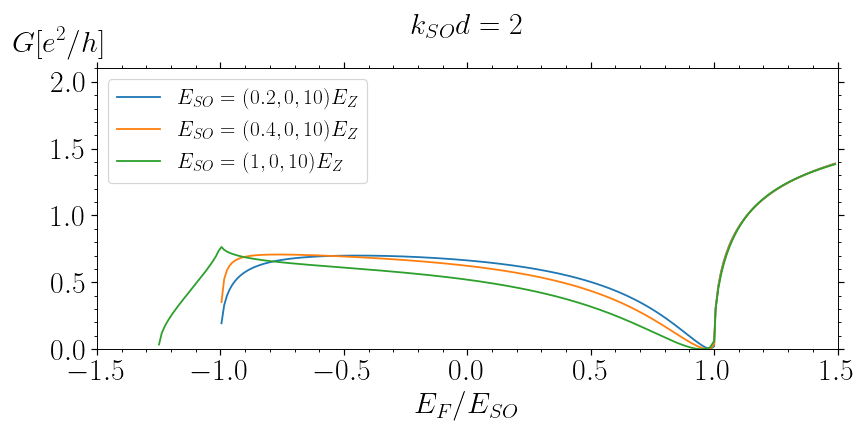

(0.2, 0, 10)
(0.4, 0, 10)
(1, 0, 10)
plots/paper_plots_2/paper/magnetic_barier[(0.2, 0, 10), (0.4, 0, 10), (1, 0, 10)].pdf


In [15]:
%matplotlib notebook
%matplotlib notebook

plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(10, 5), dpi=DPI, tight_layout=True, facecolor='white')

k_list = list(trasmission_coeff_total.keys())

for i, k in enumerate(k_list[:3]):
    print(k)
    axs.plot(en, trasmission_coeff_total[k][0],
                   label=r"$E_{SO} = "f"{k}""E_Z$")

axs.set_ylim(0,2.1)
axs.set_xlim(-1.5, 1.5)

# axs.grid()
axs.legend(fontsize = legend_font_size)
axs.set_xlabel(x_label[2], fontdict=font)
axs.set_ylabel(y_label[0], rotation=0, fontdict=font)


axs.yaxis.set_label_coords(*y_label_pos[0])

x_magior = np.array([0.5])
x_minor = np.array([0.1])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])

plt.title(r"$k_{SO}d = 2$", 
              fontsize = 25, x=0.5, y=1.1)

# SAVE = True
SAVE = False

save_path = BASE_PATH+f"magnetic_barier{k_list[:3]}.pdf"
print(save_path)

if SAVE:
    plt.savefig(save_path, 
            transparent = False, 
            bbox_inches='tight')

plt.show()

<IPython.core.display.Javascript object>


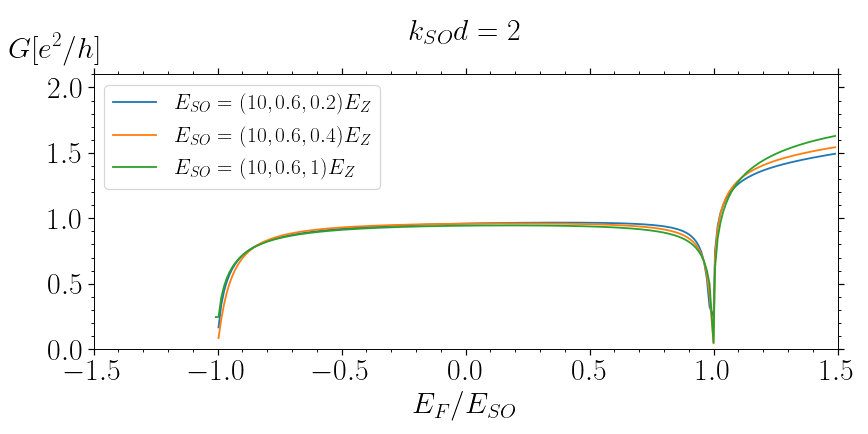

(10, 0.6, 0.2)
(10, 0.6, 0.4)
(10, 0.6, 1)
plots/paper_plots_2/paper/magnetic_barier[(10, 0.6, 0.2), (10, 0.6, 0.4), (10, 0.6, 1)].pdf


In [16]:
%matplotlib notebook
%matplotlib notebook

plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(10, 5), dpi=DPI, tight_layout=True, facecolor='white')

k_list = list(trasmission_coeff_total.keys())

for i, k in enumerate(k_list[3:]):
    print(k)
    axs.plot(en, trasmission_coeff_total[k][0],
                   label=r"$E_{SO} = "f"{k}""E_Z$")

axs.set_ylim(0,2.1)
axs.set_xlim(-1.5, 1.5)

# axs.grid()
axs.legend(fontsize = legend_font_size)
axs.set_xlabel(x_label[2], fontdict=font)
axs.set_ylabel(y_label[0], rotation=0, fontdict=font)


axs.yaxis.set_label_coords(*y_label_pos[0])

x_magior = np.array([0.5])
x_minor = np.array([0.1])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])

plt.title(r"$k_{SO}d = 2$", 
              fontsize = 25, x=0.5, y=1.1)
# SAVE = True
SAVE = False

save_path = BASE_PATH+f"magnetic_barier{k_list[3:]}.pdf"
print(save_path)

if SAVE:
    plt.savefig(save_path, 
            transparent = False, 
            bbox_inches='tight')

plt.show()

# Inhomogeneous Magnetic field

## Vanishing SOC

In [9]:
alp_r = 0
Eso_profile = [0, alp_r, 0]
EZ_profile = [.05, 1, .05]
D_EZ = np.abs(EZ_profile[0] - EZ_profile[1])
x_profile = [0, 1]

junction = RashbaJunction([x_profile, Eso_profile, EZ_profile], logg=True, verbose=1)

@error_decorator
def g(x, par):
    # map k_z*d -> sqrt(2m/hbar) d
    junction.interface[0] = -par/(2*np.sqrt(D_EZ))
    junction.interface[1] = par/(2*np.sqrt(D_EZ))

    S = junction.get_scattering_matrix(x)
    if not S.is_unitary:
        print(f"not unitary matrix length: x-> {x}, par-> {par}")
        return np.array([np.nan, np.nan])
    else:
        return S.t_coef

# param k_z*d
param = [0.3, 1, 6]

en = np.arange(-min(EZ_profile)+.0001, 2, 0.0011)
trasmission_coeff_total = make_grid(en, param, [g])

WARNING - Use dimensional energy [meV] and length scale sqrt(2 m /hbar^2)*x [nm]


In [10]:
def T_tot(E, d, E_zl, dE_z):
    dE_zl = E_zl/dE_z
    x1 = E - dE_zl
    x2 = E + dE_zl
    
    k0 = np.sqrt(x2)
    k1 = np.sqrt(x2 + 1)
    k2 = np.sqrt(np.abs(x1 - 1))
    
    T_1 = 0.0
    T_2 = 0.0
    if 0<x1<1:
        T_1 = 1/(1+np.sinh(d*k2)**2/(4*x1*(1-x1)))
    elif x1 > 1:
        T_1 = 1/(1+np.sin(d*k2)**2/(4*x1*(x1-1)))
        
    T_2 = 4* (k0*k1)**2/(4*(k0*k1)**2 * np.cos(d*k1)**2 + (k1**2 + k0**2)**2*np.sin(d*k1)**2)
    return T_1 + T_2
    

<IPython.core.display.Javascript object>


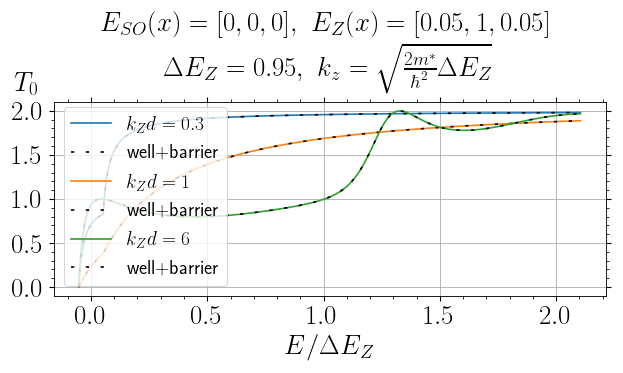

0.3
1
6
plots/paper_plots_2/paper/Inhomogeneous_E_Z-only.pdf


In [11]:
%matplotlib notebook
%matplotlib notebook

plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(10, 6), dpi=100, tight_layout=True, facecolor='white')

k_list = list(trasmission_coeff_total.keys())
for k in k_list:
    print(k)
    axs.plot(en/D_EZ, trasmission_coeff_total[k][0],
                   label=fr"$$ k_{{Z}} d = {k}$$")
    axs.plot(en/D_EZ, [T_tot(e, k, EZ_profile[0], D_EZ) for e in en/D_EZ],
                   label="well+barrier", linestyle=(0, (2, 7)), color='black')
#     


axs.grid()
axs.legend(fontsize = legend_font_size)
axs.set_xlabel(r"$$E / \Delta E_Z $$", fontdict=font)
axs.set_ylabel(r"$T_0$", rotation=0, fontdict=font)
axs.yaxis.set_label_coords(*y_label_pos[0])

x_magior = np.array([.5])
x_minor = np.array([0.1])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])

plt.title(r"$E_{SO}(x) = [0, 0, 0], \ E_Z(x) = "+f"{EZ_profile}$ \n"
              +r"$\Delta E_Z = "+f"{D_EZ}, \ "r"k_{z} = \sqrt{\frac{2m^*}{\hbar^2} \Delta E_{Z}}$", 
              fontsize = 25, x=0.5, y=1.1)
# SAVE = True
SAVE = False
save_path = BASE_PATH+"Inhomogeneous_E_Z-only.pdf"
print(save_path)

if SAVE:
    plt.savefig(save_path,
            transparent = False, 
            bbox_inches='tight')

plt.show()

## Lead Model

In [2]:
alp_r = -10
Eso_profile = [0, alp_r, 0]
EZ_profile = [.5, 1, .5]
x_profile = [0, 1]
D_EZ = np.abs(EZ_profile[0] - EZ_profile[1])

junction = RashbaJunction([x_profile, Eso_profile, EZ_profile], logg=True, verbose=1)

@error_decorator
def g(x, par):
    junction[1] = par[1]
    # map k_so*d -> sqrt{2m/hbar^2} d
    junction.interface[0] = -par[0]/(2*np.sqrt(par[1]))
    junction.interface[1] = par[0]/(2*np.sqrt(par[1]))

    S = junction.get_scattering_matrix(x)
    if not S.is_unitary:
        print(f"not unitary matrix length: x-> {x}, par-> {par}")
        return np.nan
    else:
        return S.t_coef

# parameters (k_so*d, E_so)
param = [(0.3, 0.1), (0.3, 0.4), (0.3, 10), 
         (1, 0.1), (1, 0.4), (1, 10),
        (6, 0.1), (6, 0.4), (6, 10)]
# energy is dimensional
en = np.arange(-min(EZ_profile)+.0001, 2, 0.011)
trasmission_coeff_total = make_grid(en, param, [g])

WARNING - Use dimensional energy [meV] and length scale sqrt(2 m /hbar^2)*x [nm]


<IPython.core.display.Javascript object>


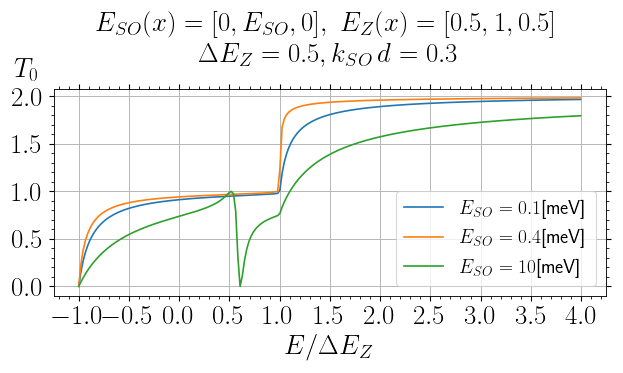

0.3
0.3
0.3
plots/paper_plots_2/paper/1_T(E)_for_k=0.3kso(0|alpha|0).pdf


In [6]:
%matplotlib notebook
%matplotlib notebook

plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(10, 6), dpi=100, tight_layout=True, facecolor='white')

k_list = list(trasmission_coeff_total.keys())
for k in k_list[0:3]:
    print(k[0])
    axs.plot(en/D_EZ, trasmission_coeff_total[k][0],
                   label=fr"$E_{{SO}} = {k[1]}$[meV]")

axs.grid()
axs.legend(fontsize = legend_font_size)
axs.set_xlabel(x_label[5], fontdict=font)
axs.set_ylabel(y_label[1], rotation=0, fontdict=font)
axs.yaxis.set_label_coords(*y_label_pos[0])

x_magior = np.array([.5])
x_minor = np.array([0.1])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])

plt.title(r"$E_{SO}(x) = [0, E_{SO}, 0], \ E_Z(x) = "+f"{EZ_profile}$ \n"
              +r"$\Delta E_Z = "+f"{D_EZ},"
              +r"k_{SO} \, d = "+f"{k_list[0][0]}$", 
              fontsize = 25, x=0.5, y=1.1)

    
# SAVE = True
SAVE = False
save_path = BASE_PATH+f"1_T(E)_for_k={k_list[0][0]}kso(0|alpha|0).pdf"
print(save_path)

if SAVE:
    plt.savefig(save_path,
            transparent = False, 
            bbox_inches='tight')

plt.show()

<IPython.core.display.Javascript object>


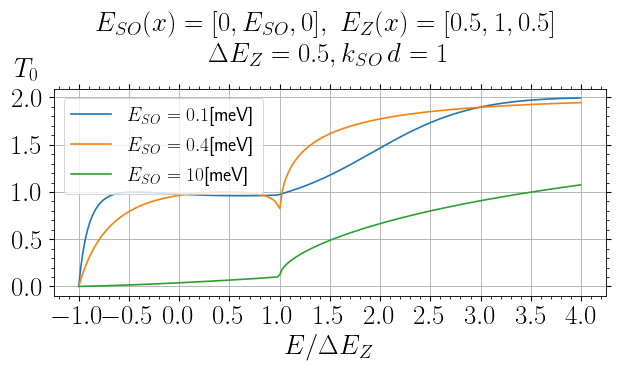

1
1
1
plots/paper_plots_2/paper/1_T(E)_for_k=1kso(0|alpha|0).pdf


In [7]:
%matplotlib notebook
%matplotlib notebook

plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(10, 6), dpi=100, tight_layout=True, facecolor='white')

k_list = list(trasmission_coeff_total.keys())
for k in k_list[3:6]:
    print(k[0])
    axs.plot(en/D_EZ, trasmission_coeff_total[k][0],
                   label=fr"$E_{{SO}} = {k[1]}$[meV]")


axs.grid()
axs.legend(fontsize = legend_font_size)
axs.set_xlabel(x_label[5], fontdict=font)
axs.set_ylabel(y_label[1], rotation=0, fontdict=font)
axs.yaxis.set_label_coords(*y_label_pos[0])
# axs.yaxis.set_label_coords(-.04, 1)


x_magior = np.array([.5])
x_minor = np.array([0.1])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])

plt.title(r"$E_{SO}(x) = [0, E_{SO}, 0], \ E_Z(x) = "+f"{EZ_profile}$ \n"
              +r"$\Delta E_Z = "+f"{D_EZ},"
              +r"k_{SO} \, d = "+f"{k_list[3][0]}$",
              fontsize = 25, x=0.5, y=1.1)
    
# SAVE = True
SAVE = False
save_path = BASE_PATH+f"1_T(E)_for_k={k_list[3][0]}kso(0|alpha|0).pdf"
print(save_path)

if SAVE:
    plt.savefig(save_path,
            transparent = False, 
            bbox_inches='tight')
plt.show()

<IPython.core.display.Javascript object>


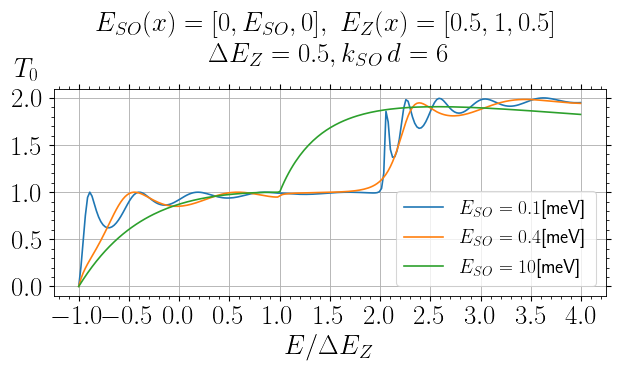

6
6
6
plots/paper_plots_2/paper/1_T(E)_for_k=6kso(0|alpha|0).pdf


In [8]:
%matplotlib notebook
%matplotlib notebook

plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(10, 6), dpi=100, tight_layout=True, facecolor='white')

k_list = list(trasmission_coeff_total.keys())
for k in k_list[6:]:
    print(k[0])
    axs.plot(en/D_EZ, trasmission_coeff_total[k][0],
                   label=fr"$E_{{SO}} = {k[1]}$[meV]")


axs.grid()
axs.legend(fontsize = legend_font_size)
axs.set_xlabel(x_label[5], fontdict=font)
axs.set_ylabel(y_label[1], rotation=0, fontdict=font)
axs.yaxis.set_label_coords(*y_label_pos[0])

x_magior = np.array([.5])
x_minor = np.array([0.1])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])

plt.title(r"$E_{SO}(x) = [0, E_{SO}, 0], \ E_Z(x) = "+f"{EZ_profile}$ \n"
              +r"$\Delta E_Z = "+f"{D_EZ},"
              +r"k_{SO} \, d = "+f"{k_list[6][0]}$",
              fontsize = 25, x=0.5, y=1.1)

# SAVE = True
SAVE = False
save_path = BASE_PATH+f"1_T(E)_for_k={k_list[6][0]}kso(0|alpha|0).pdf"
print(save_path)

if SAVE:
    plt.savefig(save_path,
            transparent = False, 
            bbox_inches='tight')
plt.show()

# Spatial wave function 

In [17]:
ee = 0.783
al_r = 10

alpha = [0, al_r, 0]
# k_so*d
ksod = 1
# k_z*d 
phi = ksod/ np.sqrt(np.abs(al_r))
print(f"{phi=}")

x_1 = -10
x_2 = - x_1
profile = [-phi/2, phi/2]

junction = RashbaJunction([profile, alpha])
S = junction.get_scattering_matrix(ee)
M = junction.transfer_matrix_at(0, ee)


def t_region_WF(x, E, a = [1, 0]):
    # left part
    if x <= junction.interface[0]:
        junction.delegate.E_so = junction[0]
        wf = junction.get_WF(x, E)
        injected = a[0]*wf[:, 0]
        reflected = np.dot(S.C, np.array(a))[0]*wf[:, 1]
        evanescent = np.dot(S.C, np.array(a))[2]*wf[:, 2]
        res = injected + reflected + evanescent
    
    elif junction.interface[0] < x < junction.interface[1]:
        junction.delegate.E_so = junction[1]
        wf = junction.get_WF(x, E)
        
        coeff = np.dot(S.C, np.array(a))
        
        left_coeff = np.array([1, coeff[0], coeff[2], 0])
        
        res = np.dot(wf, np.dot(M, left_coeff))
        
    elif x > junction.interface[1]:
        junction.delegate.E_so = junction[2]    
        wf = junction.get_WF(x, E)

        injected = a[1]*wf[:, 1]
        reflected = np.dot(S.C, np.array(a))[1]*wf[:, 0]
        evanescent = np.dot(S.C, np.array(a))[3]*wf[:, 3]
        res = injected + reflected + evanescent
    return res

    
real_1 = []
imag_1 = []

real_2 = []
imag_2 = []

# k_z*x
x_range = np.arange(x_1, x_2, 0.011)

total_wf = np.zeros((len(x_range), 2), dtype = np.complex256)
j = 0
for xx in x_range:
    r = t_region_WF(xx, ee, a=[1,0])
    total_wf[j] = r
    real_1.append(r[0].real)
    real_2.append(r[1].real)
    
    imag_1.append(r[0].imag)
    imag_2.append(r[1].imag)
    j +=1

phi=0.31622776601683794


plots/paper_plots_2/paper/wavefunction/wavefunction_ksod=1.0,E=0.783EZ.pdf


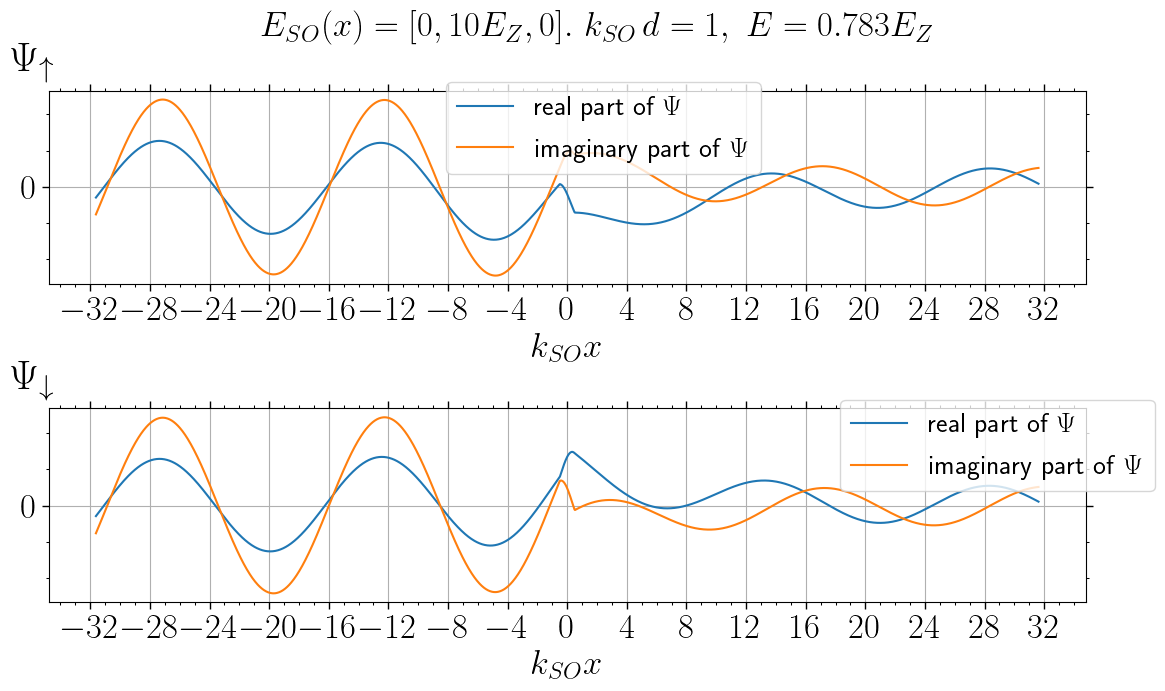

In [19]:
%matplotlib inline

# %matplotlib notebook
# %matplotlib notebook

plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(2, 1, figsize=(12, 7), dpi=100, tight_layout=True, facecolor='white')

labels_ = [r"real part of $\Psi$", 
           r"imaginary part of $\Psi$"]

# rescale length scale k_z*x -> k_so*x
axs[0].plot(x_range*np.sqrt(np.abs(al_r)), real_1, label=labels_[0])
axs[0].plot(x_range*np.sqrt(np.abs(al_r)), imag_1, label=labels_[1])

axs[1].plot(x_range*np.sqrt(np.abs(al_r)), real_2, label=labels_[0])
axs[1].plot(x_range*np.sqrt(np.abs(al_r)), imag_2, label= labels_[1])


x_magior = np.array([4, 4])
x_minor = np.array([1, 1])

y_magior = np.array([2, 2])
y_minor = np.array([0.5, 0.5])

adjuct_Tick(axs, x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font['size'])

anchor = [(0.7, 0.5), (0.75, 0.5)]
y_label_pos2 = [(-.016, 1.04), (-.016, 1.04)]
y_label2 = [r"$$\Psi_\uparrow$$", r"$$\Psi_\downarrow$$"]
for j, i in enumerate(axs):
    i.set_xlabel(r"$k_{SO} x$", fontdict=font)
    i.set_ylabel(y_label2[j], rotation=0, fontdict=font, fontsize= 30)
    i.yaxis.set_label_coords(*y_label_pos2[j])
    
    i.legend(fontsize = 20, bbox_to_anchor=anchor[j])
    i.grid(True)

    
fig.suptitle(fr"$$E_{{SO}}(x) = [0, {al_r}E_Z, 0]. \ k_{{SO}}\, d = {ksod}, \ E = {ee}E_Z$$", fontsize=25)
    
# SAVE = True
SAVE = False

save_path = BASE_PATH+"wavefunction/"+f"wavefunction_ksod={phi*np.sqrt(np.abs(al_r))},E={ee}EZ.pdf"
print(save_path)

if SAVE:
    plt.savefig(save_path, 
            transparent = False, 
            bbox_inches='tight')
plt.show()